# Hierarchical Clustering
In this notebooks we explore the techniques for hierarchical clustering using agglomerative clustering in sklearn.

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
# Special imports
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


model = SentenceTransformer('bert-base-nli-mean-tokens')

sentences2 = ['hi', 'hello', 'hi hello', 'goodbye', 'bye', 'goodbye bye']
sentences = ['fight', 'fight in', 'battle with', 'friends with', 'allow', 'be', 'escape', 'believe', 'want to','join combat']


# Although it is not explicitly stated in the official document of sentence transformer, the original BERT is meant for a shorter sentence. We will feed the model by sentences instead of the whole documents.

embeddings_sentences = model.encode(sentences)
#         embeddings = np.mean(np.array(embeddings_sentences), axis=0)

#         vectors.append(embeddings)

    


# sentences_split = [s.lower().split(' ') for s in sentences]
# import gensim
# model = gensim.models.Word2Vec(sentences_split, min_count=2)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# l = linkage(embeddings_sentences, method='complete', metric='ward')
l = shc.linkage(embeddings_sentences, method='ward')


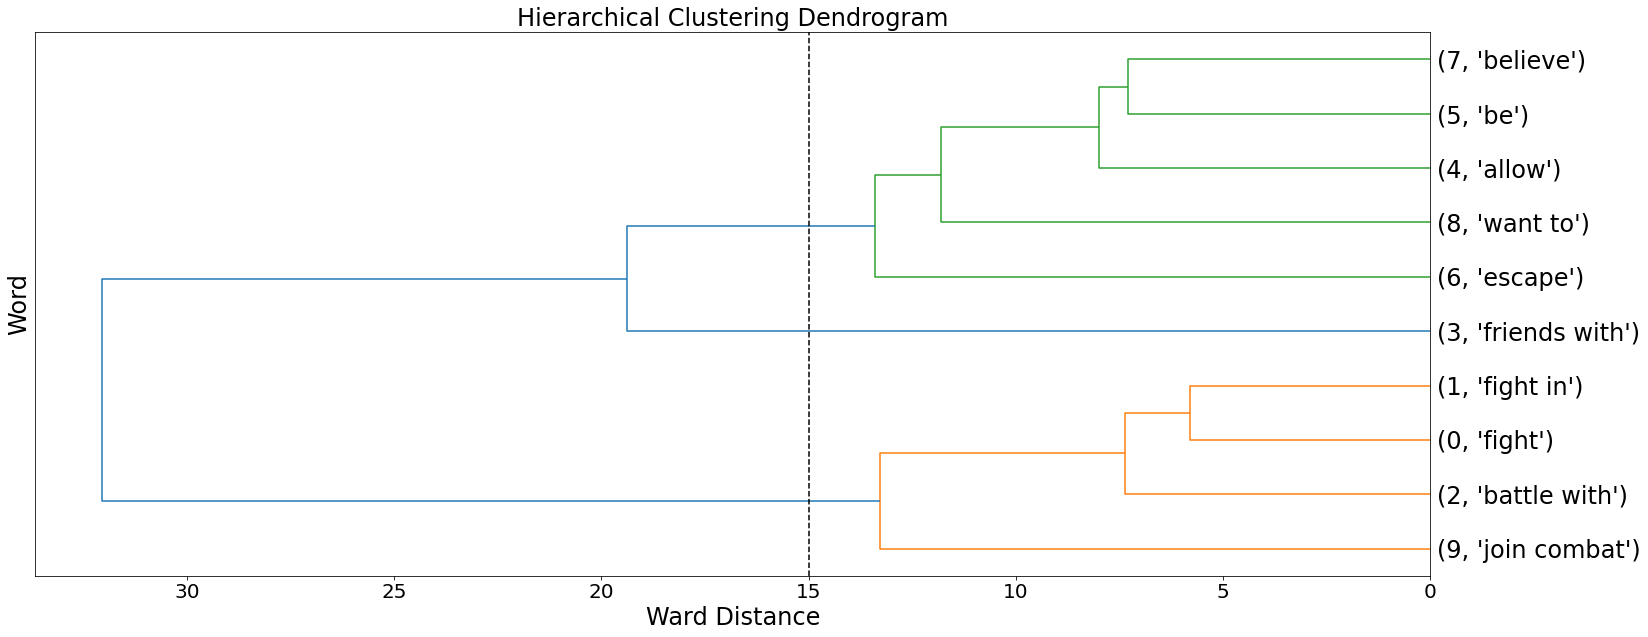

In [2]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=24)
plt.ylabel('Word', fontsize=24)
plt.xlabel('Ward Distance', fontsize=24)

dendrogram(
    l,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=24.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str((v, sentences[v])),
    color_threshold=15
)
# Cutting the dendrogram at max_d
plt.axvline(x=15, color='k', linestyle='--')
# changing the fontsize of yticks
plt.xticks(fontsize=20)
plt.show()

In [3]:
l

array([[ 0.        ,  1.        ,  5.8009219 ,  2.        ],
       [ 5.        ,  7.        ,  7.28205481,  2.        ],
       [ 2.        , 10.        ,  7.3535269 ,  3.        ],
       [ 4.        , 11.        ,  8.00295292,  3.        ],
       [ 8.        , 13.        , 11.81140509,  4.        ],
       [ 9.        , 12.        , 13.26395859,  4.        ],
       [ 6.        , 14.        , 13.40465288,  5.        ],
       [ 3.        , 16.        , 19.38455687,  6.        ],
       [15.        , 17.        , 32.05604811, 10.        ]])

Number of clusters = 3
Classifying the points into clusters:
[1 1 1 2 0 0 0 0 0 1]


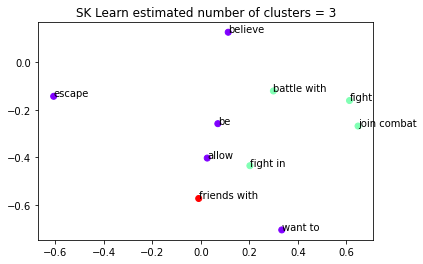

In [4]:
# Initialize hiererchial clustering method, in order for the algorithm to determine the number of clusters
# put n_clusters=None, compute_full_tree = True,
# best distance threshold value for this dataset is distance_threshold = 200
import numpy as np
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=15)

# Cluster the data
cluster.fit_predict(embeddings_sentences)

print(f"Number of clusters = {1+np.amax(cluster.labels_)}")

# Display the clustering, assigning cluster label to every datapoint 
print("Classifying the points into clusters:")
print(cluster.labels_)

# Display the clustering graphically in a plot


plt.scatter(embeddings_sentences[:,0],embeddings_sentences[:,1], c=cluster.labels_, cmap='rainbow')

# plt.scatter(new_word[0,0], new_word[0,1])
# plt.annotate('battel',(new_word[0], new_word[1]))

for i, txt in enumerate(sentences):
    plt.annotate(txt,(embeddings_sentences[i,0],embeddings_sentences[i,1]))

# plt.text(sentences, fontsize=12)
plt.title(f"SK Learn estimated number of clusters = {1+np.amax(cluster.labels_)}")
plt.show()

print(" ")

In [5]:
from collections import defaultdict
d = defaultdict(list)
for i, entry in enumerate(cluster.labels_):
    d[entry].append(sentences[i])

In [6]:
d

defaultdict(list,
            {1: ['fight', 'fight in', 'battle with', 'join combat'],
             2: ['friends with'],
             0: ['allow', 'be', 'escape', 'believe', 'want to']})

In [7]:
avg_vec = defaultdict(list)
vectors = []
model = SentenceTransformer('bert-base-nli-mean-tokens')
for key, value in sorted(d.items()):
    print(key)
    embeddings_sentences = model.encode(value)
    embeddings = np.mean(np.array(embeddings_sentences), axis=0)
    avg_vec[key].append(embeddings)
    vectors.append(embeddings)

0
1
2


In [8]:
new_word = model.encode(['battle against'])
scores = cosine_similarity(new_word, vectors).flatten()

highest_score = 0
highest_score_index = 0
for i, score in enumerate(scores):
    if highest_score < score:
        highest_score = score
        highest_score_index = i

most_similar_document = d[highest_score_index]
most_similar_document

['fight', 'fight in', 'battle with', 'join combat']

In [9]:
from scipy.cluster.hierarchy import fcluster
max_d = 15
clusters = fcluster(l, max_d, criterion='distance')
clusters

array([1, 1, 1, 3, 2, 2, 2, 2, 2, 1], dtype=int32)